# Week 7 Lab session

##Implement sorting algorithms in sub-classes of the parent class "Sort". 

In this notebook students will work on defining the Parent class "sort" with methods and instance variables which will be used in the child sorting class (Bubble, Merge and Quicksort classes) through inheritence. By the end of the exercise students will implement the respective sorting algorithm in child class and evaluate their performance using wrapper functions.

In [ ]:
import random
import time
import sys
import copy
import matplotlib.pyplot as plt

# Definitions of classes: 
Parent class Sort consists of skeleton sorting method that calls subclass' sorting methods i.e. the sorting algorithm defined within the child class. 

The parent class also has common methods (get_runtime, get_spacetaken and get_arraysize) and other instance variables which will be used across the different child classes.

Child class ("Bubble_sort", "Merge_sort" and "Quick_sort") will inherit the functionalities of parent the class and enhance this skeleton sorting method with implementation of respective sorting algorithms.

### Parent sorting class

In [ ]:
# Defining class named "Sort"
class Sort:
  '''
  This parent class consists of vanilla sorting method and other methods that returns runtime, space-taken and size of a sorted array
  '''
  def __init__(self):      # defining the __init__ method to declare instance variables
      self.runtime = 0     # holds the runtime 
      self.spacetaken = 0  # holds the spacetaken 
      self.array_size = 0  # holds the size of an array

# sorting method that calls the subclass sorting method 
  def sorting(self, unsorted_data):          
    return self.scls_sorting_method(unsorted_data)
# get_runtime method that returns run time of an sorting algorithm
  def get_runtime(self):
     return self.runtime
# get_spacetaken method that returns the space used while running the sorting algorithm
  def get_spacetaken(self):
    return self.spacetaken
# get_arraysize method that returns the length of an array to be sorted ( used for plotting time and space complexity w.r.t array size)
  def get_arraysize(self):
    return self.array_size

### Child sorting class 1: Bubble sort

In [ ]:
# Defining child class named "Bubblesort" that inherits the parent class "Sort"
class Bubblesort(Sort):
  '''
  In this child class Bubble sort algorithm will be implemented on top of parent class Sort functionalities
  '''
    def __init__(self):
        super().__init__()  # Inheriting the parent class instance variables
  
    # defining the subclass_sorting_method
    def scls_sorting_method(self, unsorted_array):
        lis_arr = copy.deepcopy(unsorted_array)
        start_time = time.time()
        for i in range(len(lis_arr)):   
            swapped = False
            for j in range(0, len(lis_arr) - i - 1):
                if lis_arr[j] > lis_arr[j + 1]:
                    temp = lis_arr[j]
                    lis_arr[j] = lis_arr[j+1]
                    lis_arr[j+1] = temp
                    swapped = True 
            if not swapped:
                break
        # populate time here itself*******
        end_time = time.time()
        self.runtime = (end_time - start_time)*1000
        #Appending the size of constant attributes used for sorting         
        self.spacetaken = sys.getsizeof(lis_arr) + sys.getsizeof(temp) + sys.getsizeof(i) + sys.getsizeof(j) + sys.getsizeof(swapped)
        #get the size of an sorted_array
        self.array_size = len(lis_arr)
        return lis_arr

### Child sorting class 2: Merge sort 

In [ ]:
# Defining child class named "Mergesort" that inherits the parent class "Sort"
class Mergesort(Sort):
  '''
  In this child class Merge sort algorithm will be implemented on top of parent class Sort functionalities
  '''
    def __init__(self):
        super().__init__()  # Inheriting the parent class instance variables
  
    # defining the recursive partition method   
    def partition(self, lis_arr):
      list_length = len(lis_arr)
      if list_length == 1:
          return lis_arr
      mid_point = list_length // 2
      left_partition = self.partition(lis_arr[:mid_point])
      self.spacetaken += sys.getsizeof(left_partition)
      right_partition = self.partition(lis_arr[mid_point:])
      self.spacetaken += sys.getsizeof(right_partition)
      return self.merge(left_partition, right_partition)

    # defining the merge method   
    def merge(self, left, right):
      output = []
      i = j = 0
      while i < len(left) and j < len(right):
          if left[i] < right[j]:
            output.append(left[i])
            i += 1
          else:
            output.append(right[j])
            j += 1
      output.extend(left[i:])
      output.extend(right[j:])
      return output                    

    #Defining the subclass sorting method that 
    def scls_sorting_method(self, lis_arr):
      self.spacetaken += sys.getsizeof(lis_arr)
      self.array_size = len(lis_arr)
      start_time = time.time()
      sorted_array = self.partition(lis_arr)
      end_time = time.time()
      self.runtime = (end_time - start_time)*1000
      return sorted_array  

### Child sorting class 3: Quick sort

In [ ]:
# Defining child class named "Quicksort" that inherits the parent class "Sort"
class Quicksort(Sort):
  '''
  In This child class Quick sort algorithm will be implemented on top of parent class Sort functionalities
  '''
    def __init__(self):
        super().__init__()      # Inheriting the parent class instance variables

    # defining the partition_method
    def partition(self, lis_arr, low, high):
        # choose the rightmost element as pivot
        pivot = lis_arr[high]
        # left limit pointer
        i = low
        # right limit pointer
        j = high - 1
        # begin traversing from both directions; stop when right and left pointer cross
        #Swap the first greatest element from left and first lowest element from the left
        while i <= j:
            if lis_arr[i] <= pivot:
                i = i + 1
            elif lis_arr[j] >= pivot:
                j = j - 1
            else:
                # swap the two
                (lis_arr[i], lis_arr[j]) = (lis_arr[j], lis_arr[i])
                # increment the counters 
                i = i + 1
                j = j - 1
        # At the end, pointer i is at the first highest element after the pivot
        # swap the pivot with the next highest element from the right
        (lis_arr[i], lis_arr[high]) = (lis_arr[high], lis_arr[i])
        # pivot is at its right position (i)
        return i

    #defining the quick_sorting_method
    def quick_sort_mthd(self, lis_arr, low, high):
        if low < high:
            # find pivot element such that
            # element smaller than pivot are on the left
            # element greater than pivot are on the right
            split = self.partition(lis_arr, low, high)   
            # recursive call on the left of pivot
            self.quick_sort_mthd(lis_arr, low, split-1)
            # recursive call on the right of pivot
            self.quick_sort_mthd(lis_arr, split+1, high)

    # defining the subclass_sorting_method
    def scls_sorting_method(self, unsorted_array):
        self.array_size = len(unsorted_array)
        lis_arr=copy.deepcopy(unsorted_array)
        self.spacetaken = sys.getsizeof(lis_arr)
        start_time = time.time()
        self.quick_sort_mthd(lis_arr, 0, len(lis_arr)-1)
        end_time = time.time()
        self.runtime = (end_time - start_time)*1000
        return lis_arr

# Wrapper functions
1. data_generator(): 
A random function that takes the data_size parameter to generate the data array of given size. It returns the unsorted arrays which will be used for sorting

2. plot_time_complexity():
 A function implemented using Matplotlib for ploting time complexity w.r.t to different array size and sorting time

3. plot_space_complexity(): 
A function implemented using Matplotlib for ploting space complexity w.r.t to different array size and space used for sorting

4. sorting_assessment(): 
A function that takes specific child class sorting object such as object of class bubble sort or merge sort or quick sort and array size as arguments. It then sorts the array of given length and returns the list of performance parameters (e.g. runtime and space taken) of the specific sorting method implemented as class

5. plot_complexity(): A function accepts objects of different sorting classes. It then iterates through different array lengths i.e 100, 1000, 10000, 100000, and uses sorting_assessment() to obtain the list of performance parameters for the given sorting object. It then calls functions  plot_time_complexity and plot_space_complexity functions to plot the performance of the sorting algorithm.

In [ ]:
def data_generator(data_size):
  '''
  This function accepts length of array as parameter which will be used for generating the data array 
  of the same size within the range (0, 100000). It then returns the randomly generated unsorted array.
  '''
  unsorted_data = random.sample(range(0, 100000), data_size)
  return unsorted_data

In [ ]:
def plot_time_complexity(array_length, time_):
  '''
  This function accepts two parameters i.e size of an sorted array and time taken for sorting the array. 
  Then plots the time complexity with array size on x-axis and time taken for sorting on y-axis
  '''
  plt.plot(array_length, time_, color='r', label='space')
  # Naming the x-axis, y-axis and the whole graph
  plt.xlabel("array_size")
  plt.ylabel("time_taken")
  plt.title("Time complexity")
    
  # Adding legend, which helps us recognize the curve according to it's color
  plt.legend()
    
  # To load the display window
  plt.show()

In [ ]:
def plot_space_complexity(array_length, space_):
  '''
  This function accepts two parameters  i.e size of an sorted array and space used while sorting the array. 
  Then plots the space complexity with array size on x-axis and space used while sorting for sorting on y-axis
  '''
  plt.plot(array_length, space_, color='g', label='space')
  # Naming the x-axis, y-axis and the whole graph
  plt.xlabel("array_size")
  plt.ylabel("space_taken")
  plt.title("Space complexity")
    
  # Adding legend, which helps us recognize the curve according to it's color
  plt.legend()
    
  # To load the display window
  plt.show()

In [ ]:
def sorting_assessment(sorting_object, data_size):
  '''
  This function is called with a specific child class sorting object i.e object of child class (bubble sort or merge sort or quick sort). 
  When called with an specific sorting object and array size parameters, it sorts the data, access the performance of the algorithm 
  (runtime and space taken) and retruns the sorted_time, sorted_spacesize, sorted_array_length
  '''
  unsorted_array = data_generator(data_size)
  sorted_array = sorting_object.sorting(unsorted_array)
  sorted_time = sorting_object.get_runtime()
  sorted_spacesize = sorting_object.get_spacetaken()
  sorted_array_length = sorting_object.get_arraysize()
  print("Unsorted array is:\n",unsorted_array)
  print("Sorted array is:\n",sorted_array)
  print("Sorting time in millisecond is:\n",sorted_time)
  print("Sorting space size is:\n",sorted_spacesize)
  print("sorted array length:\n",sorted_array_length)
  print("\n **********-------------********")
  return sorted_time, sorted_spacesize, sorted_array_length

In [ ]:
def plot_complexity(sorting_object):
  '''
  This function takes an specific sorting object and access its performance on data_arrays of different length 
  i.e 100, 1000, 10000, 100000. it then calls function the plot_time_complexity and plot_space_complexity to plot 
  and visually represent the performance of an sorting algorithm.
  '''
  time_=[] # list to store the time taken 
  space_=[] # list to store the space used 
  array_length=[] # list to store the size of an array
  for data_size in [100, 1000, 10000, 100000]:
    sorted_time,  sorted_spacesize, sorted_array_length = sorting_assessment(sorting_object, data_size)
    time_.append(sorted_time)
    space_.append(sorted_spacesize)
    array_length.append(sorted_array_length)

  plot_time_complexity(array_length,time_)
  plot_space_complexity(array_length,space_)
  return None

In [ ]:
#creating the Bubble sort object
bs = Bubblesort()

# Ploting time and space complexity for array of size 100, 1000, 10000, 100000

Unsorted array is:
 [731906, 8800101, 1947732, 4799889, 7110064, 349290, 9174875, 3207204, 4664352, 8577451, 297756, 1487597, 3289317, 4081985, 4147195, 5016587, 4217694, 1901658, 2888769, 6420414, 152272, 2530317, 3156974, 7582522, 5861514, 3526315, 7795255, 9840088, 975789, 8676636, 3276262, 5622572, 1326512, 754504, 994520, 2825291, 5340558, 2380745, 7446635, 8559978, 7539611, 3181122, 6435576, 1958056, 958737, 6547263, 4127153, 822486, 1458729, 7646630, 6583419, 6023920, 7226734, 9424587, 1563450, 4052236, 6479529, 7903654, 9763337, 9211191, 8943217, 1146752, 7408992, 8186978, 9719377, 8237840, 8955209, 2908600, 5936816, 1283772, 8576167, 2034124, 9701675, 3442589, 5053318, 9345350, 6680645, 9997537, 7975555, 2302210, 7956241, 7689571, 3714217, 5931407, 8957521, 2740735, 9728082, 8456569, 6732287, 3592709, 6790170, 101296, 2021874, 3503199, 1028255, 8167818, 9588241, 1672188, 8487188, 5104921]
Sorted array is:
 [101296, 152272, 297756, 349290, 731906, 754504, 822486, 958737, 975789

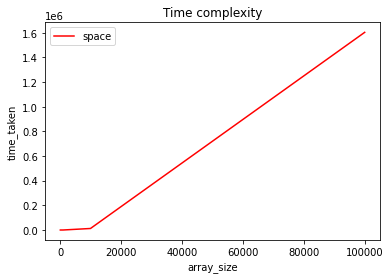

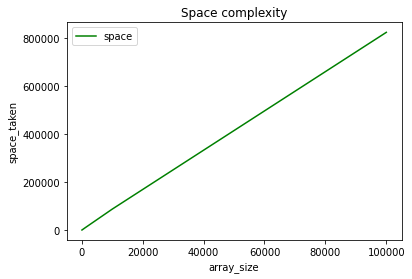

In [ ]:
#Calling the plot_complexity function with bubble sort object to visualise the performance over arrays of different size
plot_complexity(bs)

In [ ]:
#creating the Merge sort object
MS = Mergesort()

Unsorted array is:
 [29428, 88914, 36433, 82587, 31581, 81354, 22668, 45975, 45116, 82614, 30871, 39022, 70780, 69538, 19851, 33839, 51103, 48783, 60064, 88372, 10681, 522, 27614, 15175, 17513, 94918, 23183, 50249, 72954, 45993, 15754, 25424, 53097, 34862, 99668, 87302, 18582, 20003, 40226, 40940, 64346, 14864, 66617, 21906, 20957, 66137, 25198, 34439, 99495, 90234, 41073, 5645, 4387, 19178, 59185, 24068, 66492, 96516, 54849, 52901, 99665, 86419, 41936, 58814, 45004, 80120, 93406, 49181, 41705, 45008, 56624, 71431, 16940, 64380, 80192, 10666, 95627, 53057, 51851, 3851, 34768, 88968, 27374, 66573, 62248, 32684, 63588, 85947, 58915, 69381, 6178, 29384, 69033, 80003, 99432, 25397, 24283, 51284, 70705, 98683]
Sorted array is:
 [522, 3851, 4387, 5645, 6178, 10666, 10681, 14864, 15175, 15754, 16940, 17513, 18582, 19178, 19851, 20003, 20957, 21906, 22668, 23183, 24068, 24283, 25198, 25397, 25424, 27374, 27614, 29384, 29428, 30871, 31581, 32684, 33839, 34439, 34768, 34862, 36433, 39022, 40226,

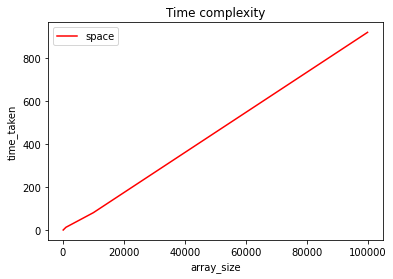

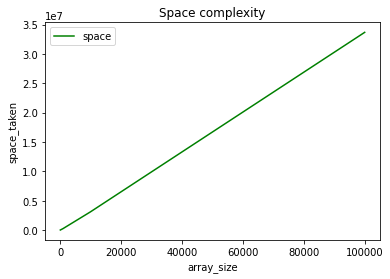

In [ ]:
#Calling the plot_complexity function with merge sort object to visualise the performance over arrays of different size
plot_complexity(MS)

In [ ]:
#creating the Bubble sort object
QS = Quicksort()

Unsorted array is:
 [34835, 64469, 99866, 758, 39641, 78096, 84426, 62701, 14888, 56028, 62195, 18502, 88624, 72244, 77534, 83601, 79996, 12983, 5210, 13257, 54440, 45009, 91778, 87876, 28622, 41501, 80920, 7186, 41770, 30698, 83027, 37903, 52599, 47236, 62628, 9755, 29730, 84819, 54700, 97862, 88021, 60435, 19303, 7430, 93965, 41079, 88907, 27486, 67496, 86250, 49670, 24200, 698, 15670, 34552, 96144, 67908, 11490, 26814, 73011, 26906, 57786, 18548, 82234, 9684, 4569, 52981, 44445, 81238, 13099, 63756, 34726, 90569, 60612, 90042, 24621, 47109, 972, 47476, 40248, 57804, 66913, 15256, 59962, 16904, 91416, 92010, 75253, 46029, 3631, 35461, 50883, 54694, 62013, 87602, 17373, 20851, 6057, 30589, 4075]
Sorted array is:
 [698, 758, 972, 3631, 4075, 4569, 5210, 6057, 7186, 7430, 9684, 9755, 11490, 12983, 13099, 13257, 14888, 15256, 15670, 16904, 17373, 18502, 18548, 19303, 20851, 24200, 24621, 26814, 26906, 27486, 28622, 29730, 30589, 30698, 34552, 34726, 34835, 35461, 37903, 39641, 40248, 410

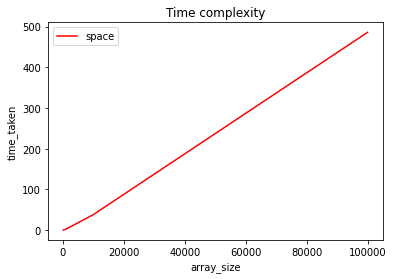

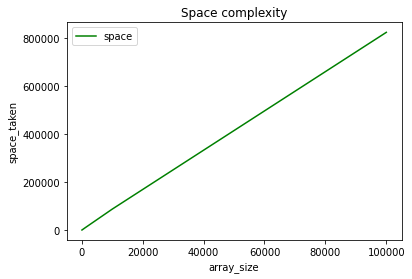

In [ ]:
#Calling the plot_complexity function with Quick sort object to visualise the performance over arrays of different size
plot_complexity(QS)

Pick a partner and grade their work based on the following parameters [here](https://forms.office.com/r/mpbhtnvMys):
- If the child classes are performing the sorting as expected
- The time and space complexity plots grow as expected
- Comments and clarity in the code 